<a href="https://colab.research.google.com/github/blitzkreig18/time_series_forecasting/blob/main/CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alpha vantage API key - 42CRESJSDQEUU477

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
api_key = "42CRESJSDQEUU477"

In [6]:
import csv
import requests
from tqdm import tqdm

def request_stock_price_list(symbol, size, token):
    q_string = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&outputsize={}&apikey={}'
    
    print("Retrieving stock price data from Alpha Vantage")
    r = requests.get(q_string.format(symbol, size, token))
    print("Data has been successfully downloaded")
    date = []
    colnames = list(range(0, 5))
    df = pd.DataFrame(columns = colnames)
    print("Sorting the retrieved data into a dataframe")
    for i in tqdm(r.json()['Time Series (Daily)'].keys()):
        date.append(i)
        row = pd.DataFrame.from_dict(r.json()['Time Series (Daily)'][i], orient='index').reset_index().T[1:]
        df = pd.concat([df, row], ignore_index=True)
    df.columns = ["open", "high", "low", "close", "volume"]
    df['date'] = date
    return df


In [7]:
stock_df = request_stock_price_list('GOOG', 'full', api_key)
print(stock_df.head())

Retrieving stock price data from Alpha Vantage
Data has been successfully downloaded
Sorting the retrieved data into a dataframe


100%|██████████| 2055/2055 [00:13<00:00, 149.22it/s]

        open       high        low      close   volume        date
0  2202.0800  2240.1100  2183.0850  2233.3300  1534399  2022-05-23
1  2241.7100  2251.0000  2127.4600  2186.2600  1879301  2022-05-20
2  2236.8200  2271.7500  2209.3600  2214.9100  1459587  2022-05-19
3  2304.7500  2313.9134  2242.8400  2248.0200  1399138  2022-05-18
4  2344.5500  2344.5500  2306.7500  2334.0300  1078804  2022-05-17


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/StockTransformer/googl.us.txt")
data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
3328,2017-11-06,1049.10,1052.59,1042.00,1042.68,913954,0
3329,2017-11-07,1049.65,1053.41,1043.00,1052.39,1303832,0
3330,2017-11-08,1050.05,1062.69,1047.05,1058.29,1214469,0
3331,2017-11-09,1048.00,1050.88,1035.85,1047.72,1793994,0
3332,2017-11-10,1043.87,1046.63,1041.22,1044.15,970498,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3333 non-null   object 
 1   Open     3333 non-null   float64
 2   High     3333 non-null   float64
 3   Low      3333 non-null   float64
 4   Close    3333 non-null   float64
 5   Volume   3333 non-null   int64  
 6   OpenInt  3333 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 182.4+ KB


In [16]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03,3333.0
mean,389.993375,393.377354,386.213266,389.855821,7.951734e+06,0.0
std,235.104757,236.348229,233.616339,235.102374,8.327410e+06,0.0
min,49.595000,50.870000,47.980000,50.005000,0.000000e+00,0.0
25%,228.730000,230.930000,226.170000,228.510000,2.535424e+06,0.0
50%,295.980000,298.190000,293.350000,295.610000,5.201600e+06,0.0
75%,550.370000,554.780000,545.500000,549.490000,1.047400e+07,0.0
max,1050.050000,1063.620000,1047.050000,1058.290000,8.223340e+07,0.0


In [18]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [19]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


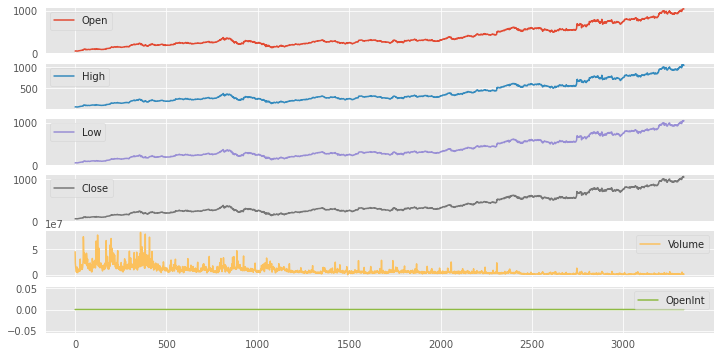

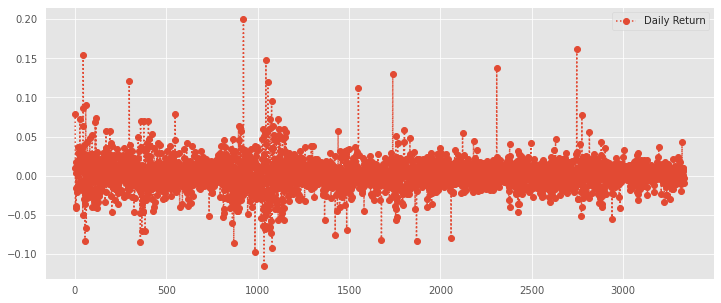

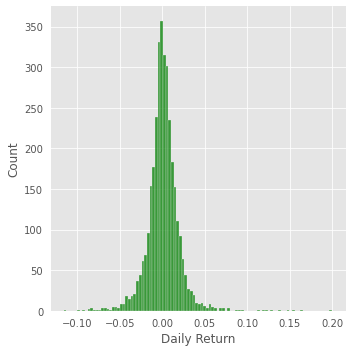

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


            Date      Open     High       Low     Close    Volume  OpenInt  \
0     2004-08-19    50.000    52.03    47.980    50.170  44703800        0   
1     2004-08-20    50.505    54.54    50.250    54.155  22857200        0   
2     2004-08-23    55.375    56.74    54.525    54.700  18274400        0   
3     2004-08-24    55.620    55.80    51.785    52.435  15262600        0   
4     2004-08-25    52.480    54.00    51.940    53.000   9197800        0   
...          ...       ...      ...       ...       ...       ...      ...   
3328  2017-11-06  1049.100  1052.59  1042.000  1042.680    913954        0   
3329  2017-11-07  1049.650  1053.41  1043.000  1052.390   1303832        0   
3330  2017-11-08  1050.050  1062.69  1047.050  1058.290   1214469        0   
3331  2017-11-09  1048.000  1050.88  1035.850  1047.720   1793994        0   
3332  2017-11-10  1043.870  1046.63  1041.220  1044.150    970498        0   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Re

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
OpenInt            0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

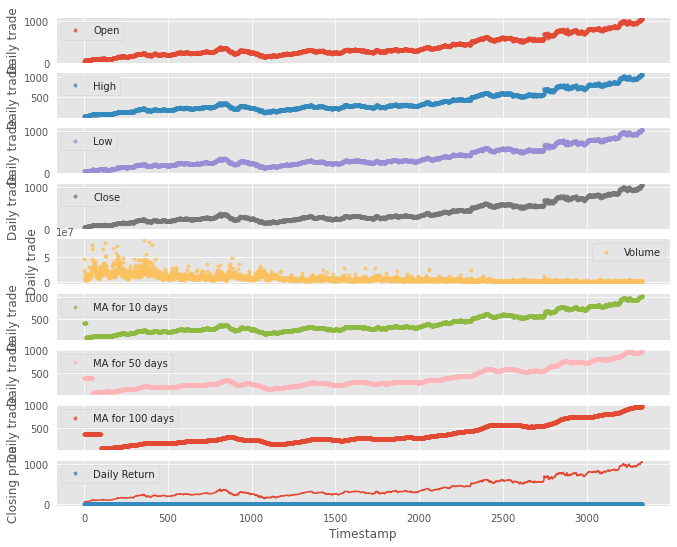

In [20]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()


            Date      Open     High       Low     Close    Volume  OpenInt  \
0     2004-08-19    50.000    52.03    47.980    50.170  44703800        0   
1     2004-08-20    50.505    54.54    50.250    54.155  22857200        0   
2     2004-08-23    55.375    56.74    54.525    54.700  18274400        0   
3     2004-08-24    55.620    55.80    51.785    52.435  15262600        0   
4     2004-08-25    52.480    54.00    51.940    53.000   9197800        0   
...          ...       ...      ...       ...       ...       ...      ...   
3328  2017-11-06  1049.100  1052.59  1042.000  1042.680    913954        0   
3329  2017-11-07  1049.650  1053.41  1043.000  1052.390   1303832        0   
3330  2017-11-08  1050.050  1062.69  1047.050  1058.290   1214469        0   
3331  2017-11-09  1048.000  1050.88  1035.850  1047.720   1793994        0   
3332  2017-11-10  1043.870  1046.63  1041.220  1044.150    970498        0   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Re

,count,mean,std,min,25%,50%,75%,max
Open,3333.0,3.899934e+02,2.351048e+02,49.595000,2.287300e+02,2.959800e+02,5.503700e+02,1.050050e+03
High,3333.0,3.933774e+02,2.363482e+02,50.870000,2.309300e+02,2.981900e+02,5.547800e+02,1.063620e+03
Low,3333.0,3.862133e+02,2.336163e+02,47.980000,2.261700e+02,2.933500e+02,5.455000e+02,1.047050e+03
Close,3333.0,3.898558e+02,2.351024e+02,50.005000,2.285100e+02,2.956100e+02,5.494900e+02,1.058290e+03
Volume,3333.0,7.951734e+06,8.327410e+06,0.000000,2.535424e+06,5.201600e+06,1.047400e+07,8.223340e+07
OpenInt,3333.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MA for 10 days,3333.0,3.894211e+02,2.333697e+02,51.191000,2.291540e+02,2.954380e+02,5.506650e+02,1.044696e+03
MA for 50 days,3333.0,3.877341e+02,2.264879e+02,63.523400,2.336058e+02,2.958146e+02,5.505300e+02,9.855770e+02
MA for 100 days,3333.0,3.857275e+02,2.187208e+02,77.187550,2.359894e+02,2.967110e+02,5.496162e+02,9.683202e+02
Daily Return,3333.0,1.095189e-03,1.927832e-02,-0.116091,-7.695596e-03,6.766205e-04,9.696709e-03,1.998932e-01


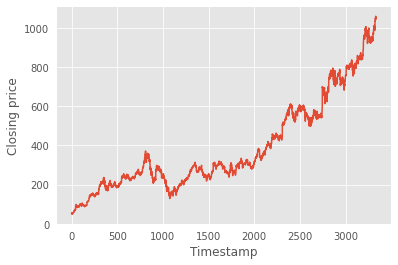

In [21]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [22]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2584
647


Model creation and Training

In [26]:
# For creating model and training
import tensorflow as tf
from keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from keras.layers import MaxPooling1D, Flatten
from keras.regularizers import L1, L2
from keras.metrics import Accuracy
from keras.metrics import RootMeanSquaredError

In [27]:
model = tf.keras.Sequential()

In [28]:
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

In [29]:
# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

In [30]:
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [32]:
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
65/65 [==============================] - 3s 46ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0603 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0562
Epoch 2/40
65/65 [==============================] - 3s 48ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0542 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0524
Epoch 3/40
65/65 [==============================] - 2s 34ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0498 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0479
Epoch 4/40
65/65 [==============================] - 2s 34ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0478 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0455
Epoch 5/40
65/65 [==============================] - 2s 34ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0475 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0480
Epoch 6/40
65/65 [==============================] - 2s 35ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0470 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0471
Epoch 7/40
65/65 [====

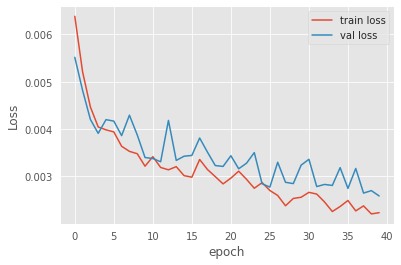

In [33]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

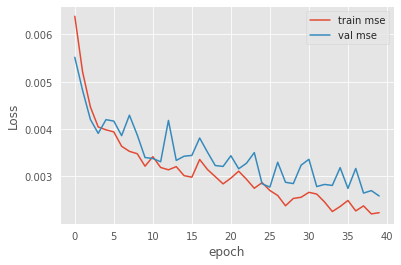

In [34]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

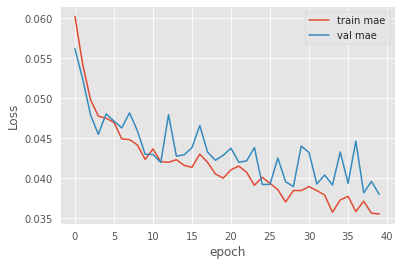

In [35]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)       

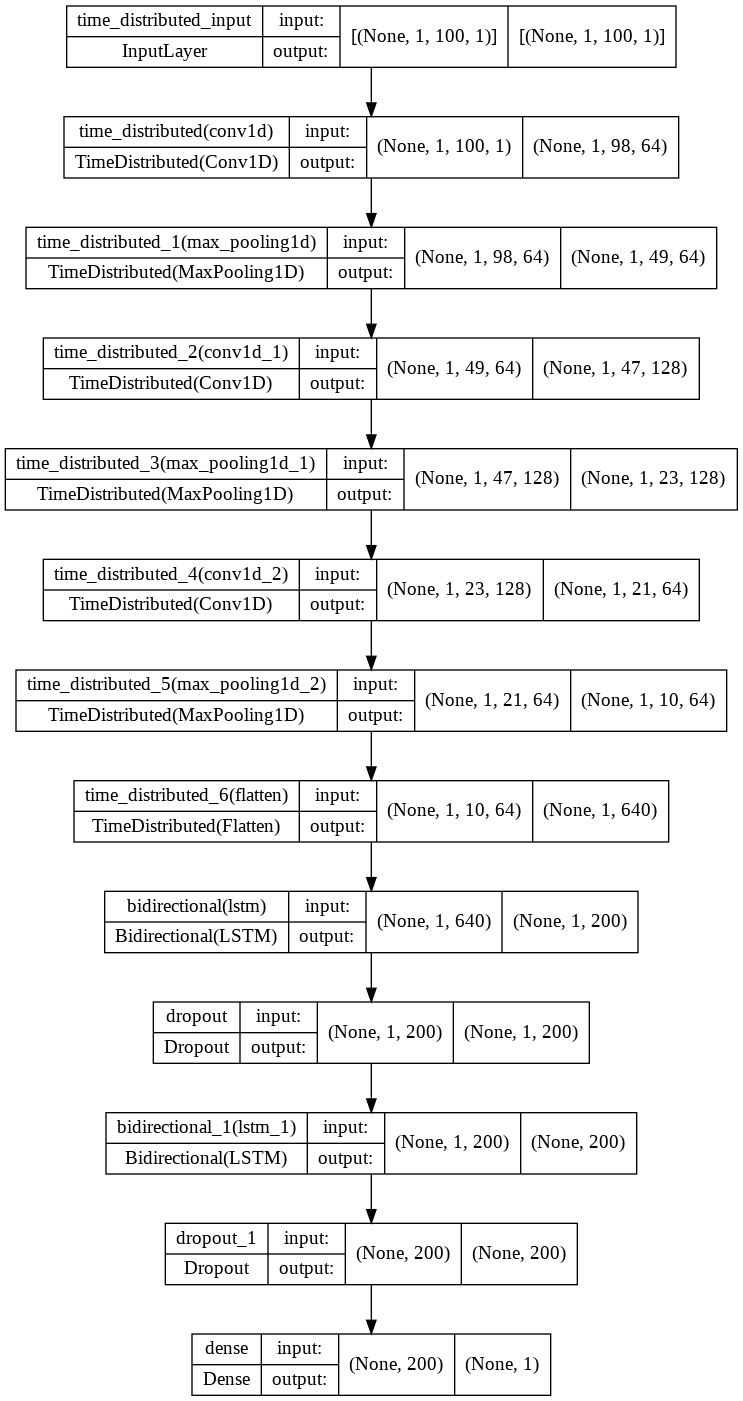

In [36]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [37]:
model.evaluate(test_X, test_Y)

21/21 [==============================] - 0s 11ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0379


[0.002588218543678522, 0.002588218543678522, 0.037931207567453384]

In [38]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.933957
R2 Score: 0.933957
Max Error: 0.259881


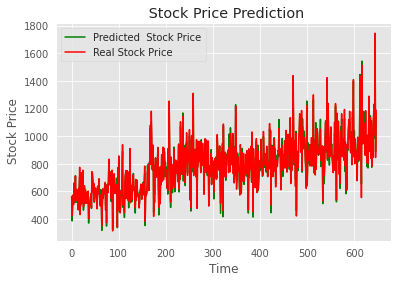

In [39]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [40]:
model.save("model.h5")

In [41]:
new_model = tf.keras.models.load_model("./model.h5")

In [42]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)       

In [67]:
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StockTransformer/googl.us.txt')
data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()

df2 = data2
print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


            Date      Open     High       Low     Close    Volume  OpenInt
0     2004-08-19    50.000    52.03    47.980    50.170  44703800        0
1     2004-08-20    50.505    54.54    50.250    54.155  22857200        0
2     2004-08-23    55.375    56.74    54.525    54.700  18274400        0
3     2004-08-24    55.620    55.80    51.785    52.435  15262600        0
4     2004-08-25    52.480    54.00    51.940    53.000   9197800        0
...          ...       ...      ...       ...       ...       ...      ...
3328  2017-11-06  1049.100  1052.59  1042.000  1042.680    913954        0
3329  2017-11-07  1049.650  1053.41  1043.000  1052.390   1303832        0
3330  2017-11-08  1050.050  1062.69  1047.050  1058.290   1214469        0
3331  2017-11-09  1048.000  1050.88  1035.850  1047.720   1793994        0
3332  2017-11-10  1043.870  1046.63  1041.220  1044.150    970498        0

[3333 rows x 7 columns]


In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2584
647


In [69]:
model.evaluate(test_X, test_Y)

21/21 [==============================] - 0s 8ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0269


[0.0015061714220792055, 0.0015061714220792055, 0.026865996420383453]

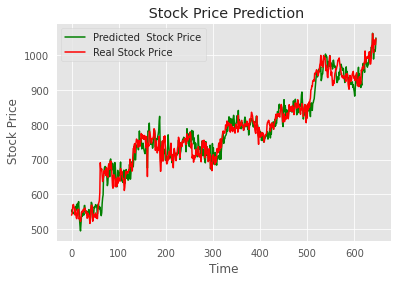

In [70]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()